In [1]:
!pip install tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.5/20.5 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [3]:
#importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## divide dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head(3)

,Exited
0,1
1,0
2,1


In [8]:
## Feature Engineering

geography=pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender=pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [9]:
# concatenate these variables with dataset
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X=pd.concat([X,geography,gender],axis=1)

In [12]:
# Spliting the dataset into test and training dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
# feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [20]:
## Creating the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [21]:
## initializing the ANN

classifier=Sequential()

In [22]:
## adding the input layer

classifier.add(Dense(units=11,activation='relu'))

In [42]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [43]:
## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [44]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [45]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
## Early stopping

import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [47]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8107 - loss: 0.5997 - val_accuracy: 0.8413 - val_loss: 0.4118
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8467 - loss: 0.4247 - val_accuracy: 0.8410 - val_loss: 0.3880
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8603 - loss: 0.3870 - val_accuracy: 0.8474 - val_loss: 0.3801
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8493 - loss: 0.3789 - val_accuracy: 0.8429 - val_loss: 0.3800
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8530 - loss: 0.3725 - val_accuracy: 0.8501 - val_loss: 0.3726
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8480 - loss: 0.3698 - val_accuracy: 0.8523 - val_loss: 0.3713
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8565 - loss: 0.3655 - val_accuracy: 0.8504 - val_loss: 0.3715
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8616 - loss: 0.3560 - 

In [48]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

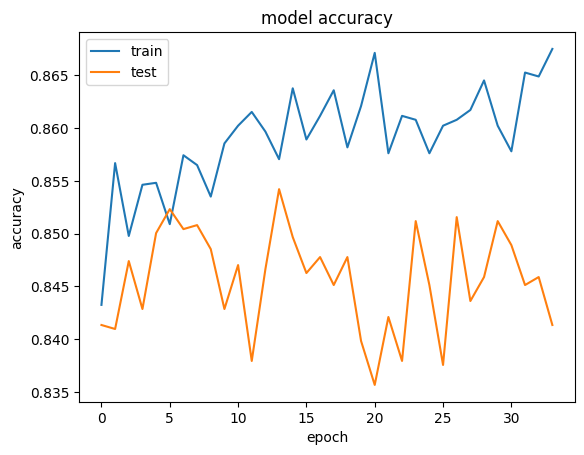

In [49]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

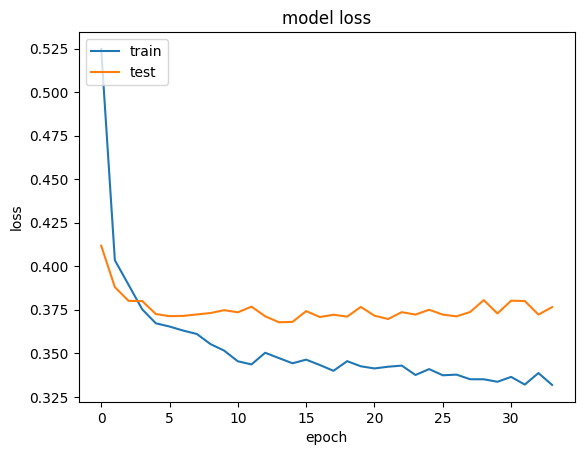

In [50]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [51]:
# making the prediction and evaluating the model

y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [52]:
## making the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1568,   27],
       [ 264,  141]])

In [53]:
# calculating the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8545

In [54]:
# getting the weights

classifier.get_weights()

[array([[ 2.67709404e-01, -1.27689615e-01, -4.21035498e-01,
          3.19673330e-01, -8.95937532e-02,  2.53733378e-02,
         -2.08928078e-01, -3.16237986e-01, -3.42503947e-04,
         -2.98029073e-02, -7.14793205e-02],
        [-3.33324552e-01, -2.97272461e-03,  2.20570251e-01,
         -1.56231165e-01,  2.84386516e-01,  1.23566411e-01,
         -1.72232568e-01,  1.39420962e+00,  4.23895828e-02,
         -7.00743794e-01, -5.56683600e-01],
        [ 5.35193384e-01,  1.34434164e-01, -1.68518573e-01,
          3.95319968e-01, -1.65332228e-01, -5.18790968e-02,
          6.79368079e-01,  2.10678726e-01,  1.94336668e-01,
          1.17862813e-01,  4.68911469e-01],
        [ 3.20556641e-01, -5.20364821e-01,  5.44423699e-01,
         -8.05603620e-03,  7.23530233e-01,  1.05146348e-01,
         -3.57292980e-01,  2.17891976e-01, -1.87336028e-01,
          2.58289814e-01, -5.89829266e-01],
        [ 5.83817959e-01, -1.05971026e+00, -1.42633528e-01,
         -3.76156837e-01,  1.06454802e+00, -